# **Problem Statement:**
Create a machine learning model that can **predict the genre of a movie based on its plot summary or other textual information**. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the training data
train_df = r'C:\Users\priya\Downloads\Genre Classification\Genre Classification Dataset\train_data.txt'
train_df = pd.read_csv(train_df, sep=':::', names=['ID','Title', 'Genre', 'Description'], engine='python')

In [3]:
train_df

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
print(train_df.describe())

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [6]:
print(train_df.isna().sum())

ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [7]:
# Load the test data
test_df = r'C:\Users\priya\Downloads\Genre Classification\Genre Classification Dataset\test_data.txt'
test_df = pd.read_csv(test_df, sep=':::', names=['Id', 'Title', 'Description'], engine='python',index_col=0)
test_df.head()

,Title,Description
Id,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


# Exploratory Data Analysis and Data Visualization

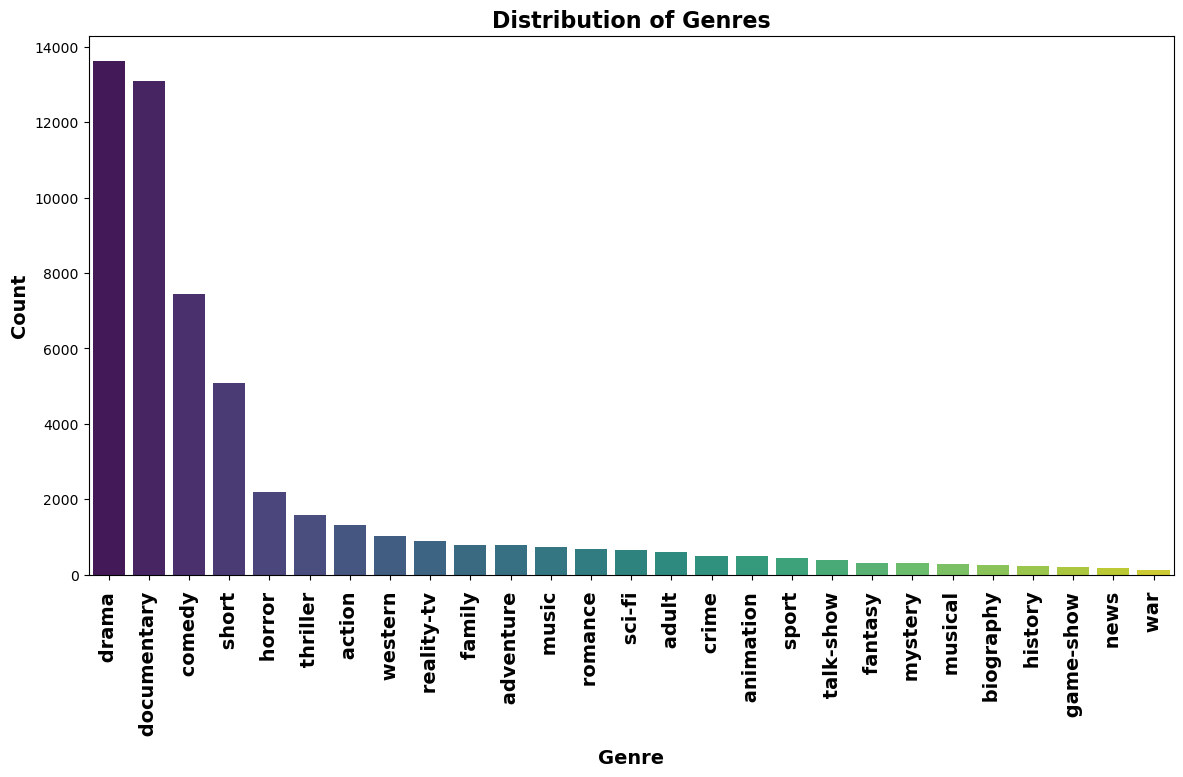

In [8]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_df['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

# Data Preprocessing and Text Cleaning

In [10]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_df['Text_cleaning'] = train_df['Description'].apply(clean_text)
test_df['Text_cleaning'] = test_df['Description'].apply(clean_text)

In [11]:
train_df.head()

,ID,Title,Genre,Description,Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


In [12]:
test_df.head()

,Title,Description,Text_cleaning
Id,,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


# Text Vectorization Using TF-IDF

In [13]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
Le = LabelEncoder()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_df['Text_cleaning'])
train_df['Genre'] = Le.fit_transform(train_df['Genre'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_df['Text_cleaning'])


In [14]:
# Split the data into training and validation sets
x = X_train
y = train_df['Genre']


X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
#Model Building 
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
ypred = Lr.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, ypred)
conf_matrix = confusion_matrix(y_val, ypred)
class_report = classification_report(y_val, ypred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5808355621138062
Confusion Matrix:
 [[  58    0    0    0    0   18    1   37  122    0    0    0    0    7
     0    0    0    0    0    0    3    6    2    0    8    0    1]
 [   0   23    9    0    0   36    0    7   26    0    0    0    0    2
     0    0    0    0    0    0    0    8    0    0    0    0    1]
 [   5    1   15    0    0   11    0   26   54    1    0    0    0   12
     0    0    0    0    0    0    4    7    0    0    2    0    1]
 [   1    0    0    2    0   27    0   21   30    4    0    0    0    2
     1    0    0    0    0    0    6   10    0    0    0    0    0]
 [   0    0    0    0    0    2    0   41   17    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   3    1    0    0    0  851    0   95  427    1    0    0    0   10
     2    0    0    0    3    1    1   44    1    0    3    0    0]
 [   3    0    0    0    0   17    1   13   63    0    0    0    0    3
     0    0    0    0    0    0    0    

In [29]:
len(Le.classes_)

27

In [27]:
len(ypred)

10843

In [ ]:
Genre

In [35]:
#getting predictions on test data 
Pred_test = Lr.predict(X_test)
print(Pred_test)

# Create a DataFrame with actual values, predicted values, and features
results = pd.DataFrame()
results['Title']= test_df['Title']
results['Description'] = test_df['Description']
results['Predicted Genre'] = Le.inverse_transform(Pred_test)

[5 8 7 ... 8 7 7]


In [36]:
results

,Title,Description,Predicted Genre
Id,,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",comedy
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
5,Er nu zhai (1955),Before he was known internationally as a mart...,drama
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",drama
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,drama
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,drama


In [39]:
# Load the test solution data
test_sol = r'C:\Users\priya\Downloads\Genre Classification\Genre Classification Dataset\test_data_solution.txt'
test_sol = pd.read_csv(test_sol, sep=':::', names=['ID','Title', 'Genre', 'Description'], engine='python')
test_sol['Genre'] = Le.fit_transform(test_sol['Genre'])

In [40]:
accuracy_score(test_sol['Genre'],Pred_test)

0.5803321033210332